In [8]:
import SimpleITK as sitk
import os
import re

def natural_keys(text):
    """
    Helper function to sort strings containing numbers in natural order.
    e.g., "image_2.tif" comes before "image_10.tif"
    """
    return [int(c) if c.isdigit() else c for c in re.split('(\d+)', text)]

def load_images(directory):
    """Load and naturally sort all TIFF images from a directory."""
    images = []
    # List only TIFF files (case-insensitive)
    tiff_files = [f for f in os.listdir(directory) if f.lower().endswith('.tif')]
    # Sort files in natural order
    tiff_files.sort(key=natural_keys)
    
    for file_name in tiff_files:
        path = os.path.join(directory, file_name)
        # Read the image using SimpleITK
        image = sitk.ReadImage(path, sitk.sitkFloat32)
        images.append(image)
    
    return images

directory = '/Users/abtinsalehi/Desktop/SAFT/SAFT V2'
images = load_images(directory)


In [10]:
def create_3d_volume(images):
    """Create a 3D volume from a list of 2D images."""
    volume = sitk.JoinSeries(images)
    return volume

volume = create_3d_volume(images)

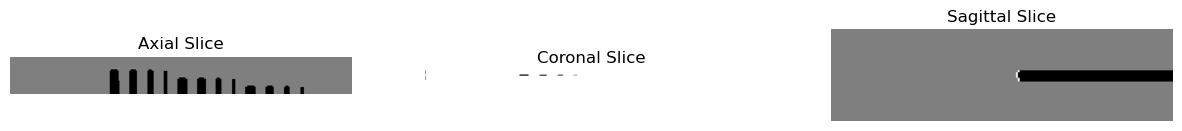

In [12]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def visualize_slices(volume):
    """Visualize axial, coronal, and sagittal slices from the middle of the volume."""
    size = volume.GetSize()
    # Get the middle index of each dimension
    axial_index = size[2] // 2
    coronal_index = size[1] // 2
    sagittal_index = size[0] // 2

    # Extract the slices using SimpleITK
    axial_slice = sitk.GetArrayFromImage(volume[:,:,axial_index])
    coronal_slice = sitk.GetArrayFromImage(volume[:,coronal_index,:])
    sagittal_slice = sitk.GetArrayFromImage(volume[sagittal_index,:,:])

    # Plot the slices
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(axial_slice, cmap='gray')
    axs[0].set_title('Axial Slice')
    axs[1].imshow(coronal_slice, cmap='gray')
    axs[1].set_title('Coronal Slice')
    axs[2].imshow(sagittal_slice, cmap='gray')
    axs[2].set_title('Sagittal Slice')

    for ax in axs:
        ax.axis('off')  # Hide axes to improve clarity

    plt.show()

# Assume 'volume' is the SimpleITK image object you created
visualize_slices(volume)


In [14]:
def print_volume_info(volume):
    """Print the size, spacing, and origin of the volume."""
    print("Volume Size:", volume.GetSize())
    print("Volume Spacing:", volume.GetSpacing())
    print("Volume Origin:", volume.GetOrigin())

print_volume_info(volume)

Volume Size: (1700, 183, 49)
Volume Spacing: (1.0, 1.0, 1.0)
Volume Origin: (0.0, 0.0, 0.0)


In [36]:
import numpy as np
volume_array = sitk.GetArrayFromImage(volume)
print(volume_array.shape)
volume_transposed = np.transpose(volume_array,(2,0,1))
volume = sitk.GetImageFromArray(volume_transposed)
print(volume.GetSize())

(1700, 183, 49)
(183, 1700, 49)


In [38]:
import SimpleITK as sitk

def save_volume(volume, filename):
    """Save the volume to a NIfTI file."""
    sitk.WriteImage(volume, filename)

#Assuming 'new_volume' is your resampled SimpleITK image object
save_volume(volume, 'SAFT_NEW_Version.nii')
